## Data Analytics Questions

You were given a 'practice_dataset.csv' dataset, that contains data about average salary of some school graduates.
Please read in this file here, and explore it.

In [1]:
# Data exploration libraries

import json
import pandas as pd

# Web scraping libraries

import requests
from bs4 import BeautifulSoup


In [2]:
# import datasets
data = pd.read_csv('./assets/practice_dataset.csv')

# Here,either read_json or reading from json can be used to read json

# 1 method
# school_type = pd.read_json('./assets/school_type.json', lines=True, orient=str)

# 2 method
with open('./assets/school_type.json') as file:
    json_data = json.load(file)

In [3]:
# check dataset
data.head(10)

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),1,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),1,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,1,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",1,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,1,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN
5,Worcester Polytechnic Institute (WPI),1,"$61,000.00","$114,000.00","$80,000.00","$91,200.00","$137,000.00","$180,000.00"
6,Carnegie Mellon University (CMU),1,"$61,800.00","$111,000.00","$63,300.00","$80,100.00","$150,000.00","$209,000.00"
7,Rensselaer Polytechnic Institute (RPI),1,"$61,100.00","$110,000.00","$71,600.00","$85,500.00","$140,000.00","$182,000.00"
8,Georgia Institute of Technology,1,"$58,300.00","$106,000.00","$67,200.00","$85,200.00","$137,000.00","$183,000.00"
9,Colorado School of Mines,1,"$58,100.00","$106,000.00","$62,200.00","$87,900.00","$142,000.00","$201,000.00"


# Data prepation

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   School Name                        269 non-null    object
 1   School Type                        269 non-null    int64 
 2   Starting Median Salary             269 non-null    object
 3   Mid-Career Median Salary           269 non-null    object
 4   Mid-Career 10th Percentile Salary  231 non-null    object
 5   Mid-Career 25th Percentile Salary  269 non-null    object
 6   Mid-Career 75th Percentile Salary  269 non-null    object
 7   Mid-Career 90th Percentile Salary  231 non-null    object
dtypes: int64(1), object(7)
memory usage: 16.9+ KB


In [5]:
# Changing column names

data_columns = {
    "School Name" : "name",
    "School Type" : "type",
    "Starting Median Salary" : "start_p50",
    "Mid-Career Median Salary" : "mid_p50",
    "Mid-Career 10th Percentile Salary" : "mid_p10",
    "Mid-Career 25th Percentile Salary" : "mid_p25",
    "Mid-Career 75th Percentile Salary" : "mid_p75",
    "Mid-Career 90th Percentile Salary" : "mid_p90"
}

data.rename(columns=data_columns, inplace=True)

In [6]:
# In the dataset info, you can see that "... Salary" columns are objects
# in order to work with those columns, they should be converted to integer values

selected_columns = ["start_p50", "mid_p50", "mid_p10", "mid_p25", "mid_p75", "mid_p90"]

data[selected_columns] = data[selected_columns].replace(["\$", ","], "", regex=True).apply(pd.to_numeric)

In [7]:
# Check if there any null values

data.isnull().sum().sort_values(ascending=False)

mid_p10      38
mid_p90      38
name          0
type          0
start_p50     0
mid_p50       0
mid_p25       0
mid_p75       0
dtype: int64

In [8]:
# As you can see above, there 76 overall null values, these values should be filled

data['mid_p10'].fillna(data['mid_p10'].mean(), inplace=True)
data['mid_p90'].fillna(data['mid_p90'].mean(), inplace=True)

# Here, I used the mean value of the data provided, because this method is straightforward to implement
# and can work well when the missing values are missing at random. It helps preserve the overall
# distribution and does not introduce significant bias.

data.isnull().sum().sort_values(ascending=False)

name         0
type         0
start_p50    0
mid_p50      0
mid_p10      0
mid_p25      0
mid_p75      0
mid_p90      0
dtype: int64

### Other methods and their adv/disadv

```df.fillna(method='ffill', inplace=True)  # Forward fill NaN values```

-  Forward or backward filling can be useful when the data has a time-based or ordered structure. As our data is not time-based or ordered, median or mean filling is much better in this case

```df.interpolate(method='linear', inplace=True)  # Linear interpolation```
```df.interpolate(method='polynomial', order=2, inplace=True)  # Polynomial interpolation```

- Interpolation techniques can help estimate missing values based on the values of neighboring data points. It can be useful for time series or continuous data and can preserve the overall trend in the dataset.

## Task 1. 
In the dataset there is a 'School Type' column that has numircal values: they are IDs for keys that are given in 'school_type.json' file. Please, map over these IDs to replace them with their keys. Here is an expected outcome:

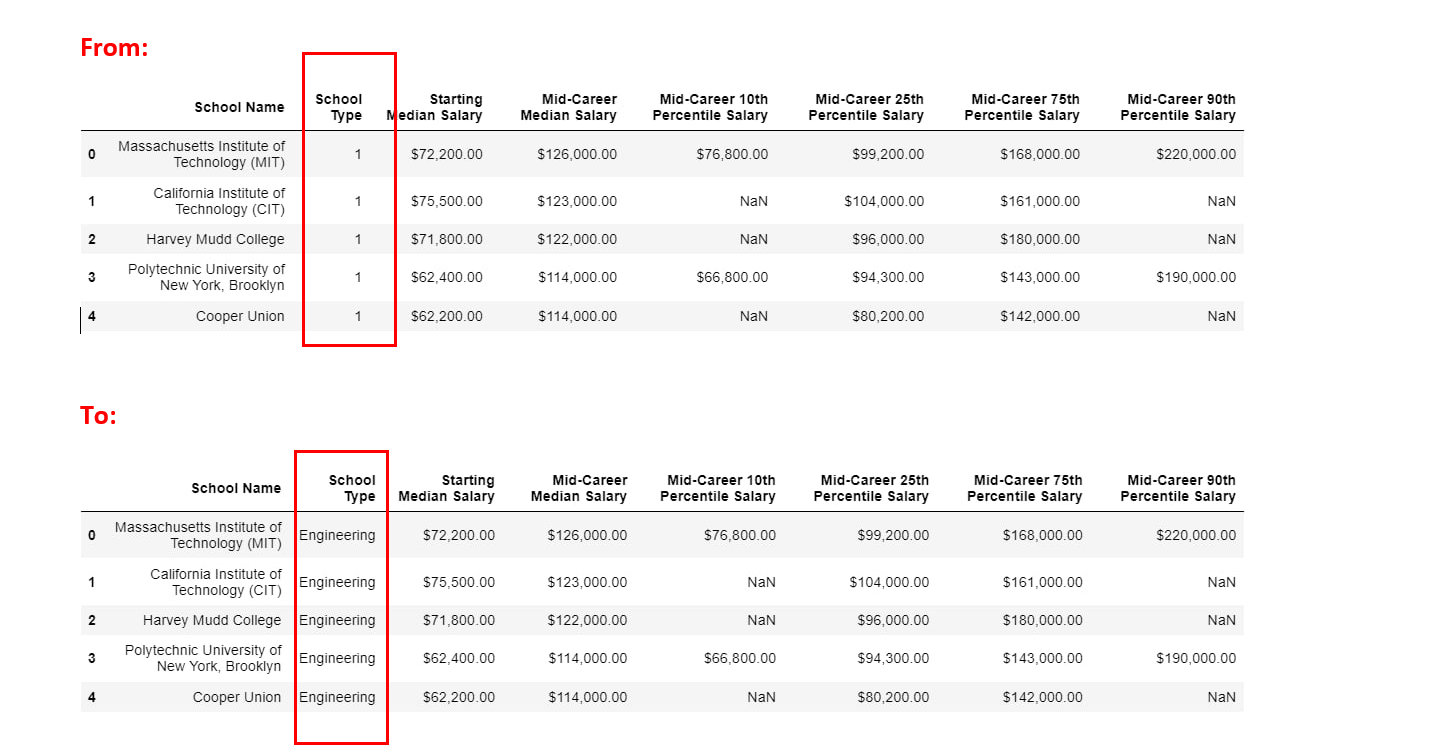

In [9]:
# 1 method to use json file

# dict_types = {}
#
# for col in range(len(school_type.columns)):
#     dict_types[school_type.iloc[0, col]['ID']] = school_type.iloc[0, col]['VALUE']

# 2 method

# Convert the JSON data into a dictionary for easier mapping:
school_type = {item['ID']: item['VALUE'] for item in json_data}

# Map the "School Type" column using the dictionary:
data['type'] = data['type'].map(school_type)

In [10]:
# Check the dataset
data.head()

,name,type,start_p50,mid_p50,mid_p10,mid_p25,mid_p75,mid_p90
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,76800.000000,99200.0,168000.0,220000.000000
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,44250.649351,104000.0,161000.0,157705.627706
2,Harvey Mudd College,Engineering,71800.0,122000.0,44250.649351,96000.0,180000.0,157705.627706
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,66800.000000,94300.0,143000.0,190000.000000
4,Cooper Union,Engineering,62200.0,114000.0,44250.649351,80200.0,142000.0,157705.627706


## Task 2
We defined a function that takes any 'School Type' value, and estimates rounded average 'Mid-Career Median Salary'for it. However, our funciton is not working. Please find an error and try to fix it.

In [11]:
def function_1(school_type, data):
    result=round(data[data['type']==school_type]['mid_p50'].mean(),2)
    print(result)

If you fix an error, apply this function to values 'Engineering', 'Party', 'Liberal Arts' and print output of the function, the end result must looks like this:

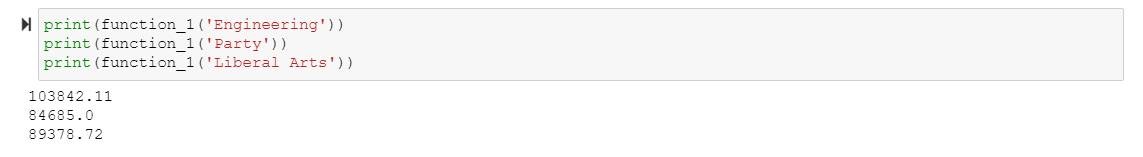

In [12]:
function_1('Engineering', data)
function_1('Party', data)
function_1('Liberal Arts', data)

103842.11
84685.0
89378.72


## Task 3
According to the National Occupational Employment and Wages Estimates, the average salary in the United States is 56,310 USD annaully. Iterate over 'Starting Median Salary' column and assign value 'more than national average' if it is more than 56,310 USD, else 'less than national average'. The result is supposed to be as such:

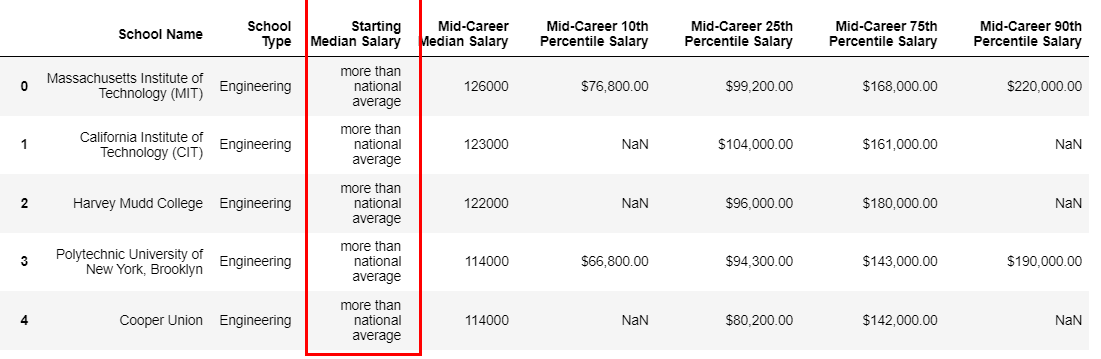

In [13]:
#start_p50
data['start_p50'] = data['start_p50'].apply(lambda x: 'more than national average' if x > 56310 \
    else 'less than national average')

Now, display all state schools that have less than national average salary.

In [14]:
state_schools_less_than_avg = data[(data['start_p50'] == 'less than national average') & (data['type'] == 'State')]
state_schools_less_than_avg_state_only = state_schools_less_than_avg['name'].unique()

print('Number of schools - ', len(state_schools_less_than_avg_state_only),'\n',\
      'All school names - ', state_schools_less_than_avg_state_only)

Number of schools -  172 
 All school names -  ['University of Virginia (UVA)'
 'University of California at Los Angeles (UCLA)'
 'University of California, San Diego (UCSD)'
 'University of California, Davis'
 'University of Colorado - Boulder (UCB)'
 'University of California, Irvine (UCI)'
 'University of Illinois at Urbana-Champaign (UIUC)'
 'Texas A&M University' 'Binghamton University'
 'San Jose State University (SJSU)' 'University of Maryland, College Park'
 'University of California, Santa Barbara (UCSB)'
 'University of Texas (UT) - Austin' 'University of Michigan'
 'Stony Brook University' 'State University of New York (SUNY) at Albany'
 'Rutgers University' 'Purdue University'
 'University of Connecticut (UConn)'
 'University of Massachusetts (UMass) - Amherst'
 'California State University (CSU), Chico' 'University of Florida (UF)'
 'University of Wisconsin (UW) - Madison'
 'Louisiana State University (LSU)'
 'California State University, Fullerton (CSUF)' 'George Mason Un

## Task4
You might have realised that some columns have missing values. Display all rows that has at least one missing value in any column. Then, consider how would you handle these missing values? Please, describe below your thoughts

In [15]:
# I handled null values when I started working with the dataset
# Firstly, The data analyst should do is to handle null/NA values in the dataset
# that's why I did it in the first place, and provided with the some methods
# that can also be used to hande them

## Task 5
Please visit this web page: https://www.upgradabroad.com/articles/forbes-unveils-americas-top-colleges-2022-list-news/
It contains several tables, that show some university rankings. Scroll till you reach "Forbes college rankings" field. First, scrape HTML table from this field and save as forbes_ranking. Then, write a function that creates new column "Ranked on Forbes" in practice_dataset and accepts Boolean values (True or False) based on the fact whether this university in forbes_ranking or not. Final result should look as follows:

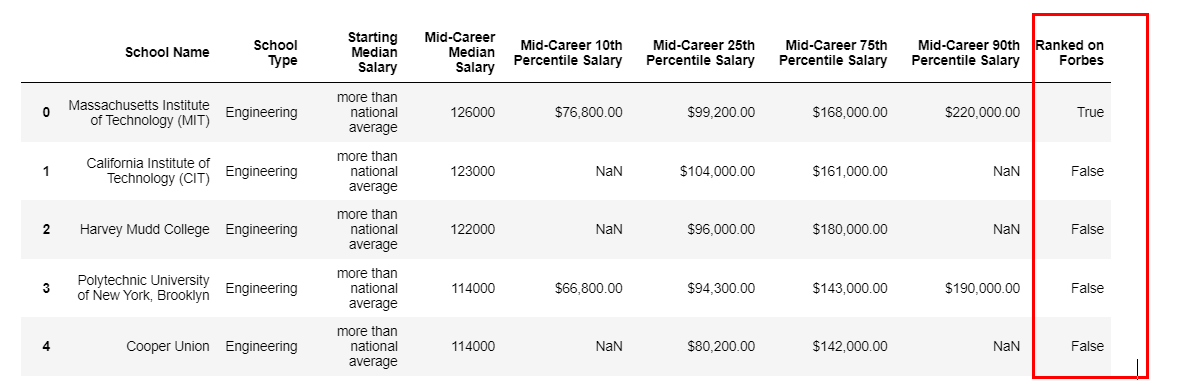

In [16]:
# Scraping the HTML table from the Wikipedia page
url = "https://www.upgradabroad.com/articles/forbes-unveils-americas-top-colleges-2022-list-news/"

response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
forbes_table = soup.find("table")
forbes_ranking = pd.read_html(str(forbes_table), header=0)[0]

# Creating the "Ranked on Forbes"
data["Ranked on Forbes"] = False

# Updating the "Ranked on Forbes" column based on the universities in the forbes_ranking table
for university in forbes_ranking["Colleges"]:
    mask = data["name"].str.contains(university, case=False, na=False)
    data.loc[mask, "Ranked on Forbes"] = True

In [17]:
data.head()

,name,type,start_p50,mid_p50,mid_p10,mid_p25,mid_p75,mid_p90,Ranked on Forbes
0,Massachusetts Institute of Technology (MIT),Engineering,more than national average,126000.0,76800.000000,99200.0,168000.0,220000.000000,True
1,California Institute of Technology (CIT),Engineering,more than national average,123000.0,44250.649351,104000.0,161000.0,157705.627706,False
2,Harvey Mudd College,Engineering,more than national average,122000.0,44250.649351,96000.0,180000.0,157705.627706,False
3,"Polytechnic University of New York, Brooklyn",Engineering,more than national average,114000.0,66800.000000,94300.0,143000.0,190000.000000,False
4,Cooper Union,Engineering,more than national average,114000.0,44250.649351,80200.0,142000.0,157705.627706,False


## Task 6
If time spent by website visitors on two difernet landing pages could be drawn as below, so that average time spent is the same for both. Based on the graph solely, what do you think what landing page (red or purple) performes better and why?

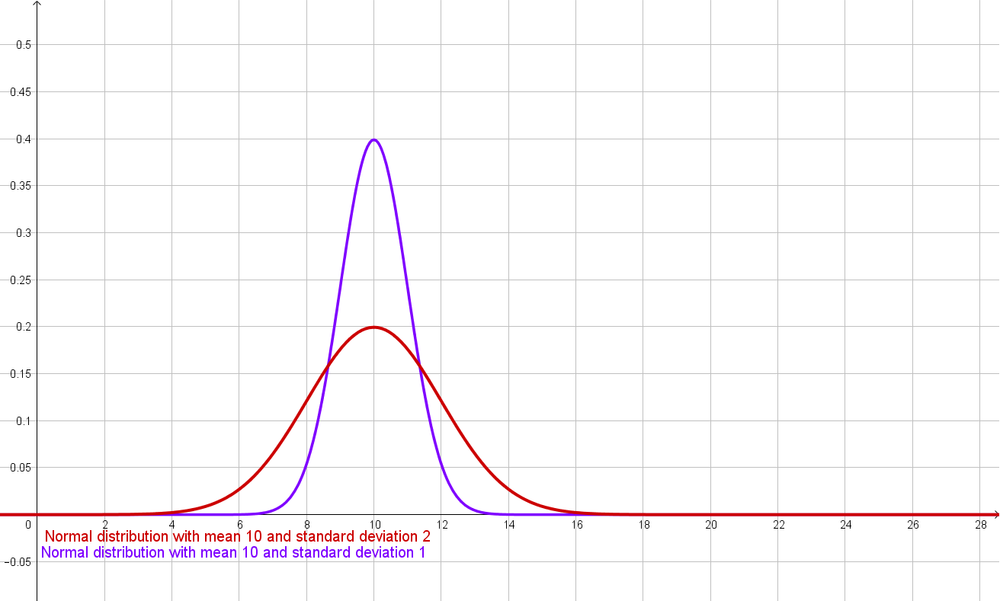

### Task 6 - Answers

- Based solely on the graph and the information provided, it is difficult to determine which landing page performs better. Both landing pages have the same average time spent, but the standard deviation is different for each.

- In the first case, with a normal distribution of 10 and a standard deviation of 2, we see that the range of time spent on the landing page is wider compared to the second case. This suggests that there is a greater variability in the time spent by visitors on the landing page. It could indicate that some visitors spend significantly more time, while others spend significantly less time.

1. Normal Distribution with Mean 10 and Standard Deviation 2:
   - This distribution has a wider spread compared to the second distribution (mean 10 and std 1).
   - The average time spent is the same for both distributions, which is 10.
   - The tails of the distribution extend further, indicating that there are some visitors who spend significantly more or less time on the landing page.
   - The distribution is relatively symmetrical around the mean, with a peak near the mean value of 10.


2. Normal Distribution with Mean 10 and Standard Deviation 1:
   - This distribution has a narrower spread compared to the first distribution (mean 10 and std 2).
   - The average time spent is the same for both distributions, which is 10.
   - The distribution has less variation, indicating that the majority of visitors spend time close to the mean value of 10.
   - The distribution is relatively symmetrical around the mean, with a sharp peak near the mean value of 10.


- The landing page with the normal distribution having a mean of 10 and a standard deviation of 1 performs better.
- This is because the distribution is narrower and indicates that visitors tend to spend time close to the average of 10.
- The narrower distribution suggests that the landing page has a more consistent user experience, with a majority of visitors spending time close to the average value.
- On the other hand, the wider distribution of the first landing page indicates more variability in the time spent, with some visitors spending significantly more or less time, potentially suggesting a less consistent user experience.

- However, it's important to note that drawing conclusions solely based on the graph can be limited. It's always advisable to complement such analysis with additional data and metrics to have a comprehensive understanding of landing page performance.

## Task 7
if a die is thrown 6 times, what is the probability of 3 of the numbers being even numbers?

### Task 7 - Answers

- A Die has six sides - 1 2 3 4 5 6
- if it is thrown 6 times, we will have $6^6$ = prob
$$
\frac{{n!}}{{k!(n-k)!}} = \binom{6}{3} = 20
$$
- The rest 3 will be $3^3 * 3^3$ times

Overall - $\frac {{20 * 27 * 27}}{6^6} * 100%$ = 31.25% 


In [18]:
data.to_csv('./assets/practice_dataset.csv', index=False)